# Planets transiting oblate stars

In the previous notebook, we mentioned that the internal starry lighcurve is not correct

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

import sympy as sp
from sympy import symbols, sin, cos, Matrix, Eq, Rational, Poly, floor, sqrt
from sympy import simplify, factorial, pi, binomial, factor, expand, collect, latex
from sympy.functions.special.tensor_functions import KroneckerDelta
from sympy import init_printing
from ipywidgets import *
from IPython.display import display, Math

## Circular case:

In [3]:
def draw(b, r):
    # Set up the figure
    fig, ax = plt.subplots(1, figsize=(4, 4))
    ax.set_xlim(min(-1.01, -r - 0.01), max(1.01, r + 0.01));
    ax.set_ylim(-1.01, max(1.01, b + r + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the two bodies
    occulted = Circle((0, 0), 1, fill=False, color='k')
    ax.add_artist(occulted)
    occulted_fill = Circle((0, 0), 1, fill=True, color='k',alpha=0.03)
    ax.add_artist(occulted_fill)
    occultor = Circle((0, b), r, fill=False, color='r')
    occultor_fill = Circle((0, b), r, fill=True, color='r',alpha=0.03)
    ax.add_artist(occultor_fill)
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b, 'ro')

    # Mark the points of intersection if they exist
    if np.abs(1 - r) < b and b < 1 + r:
        
        # Lambda
        lam = np.arcsin((1 - r * r + b * b) / (2 * b))
        x = np.cos(lam)
        y = np.sin(lam)
        plt.plot([0, x], [0, y], 'k-', alpha=0.3)
        plt.plot(x, y, 'ko', ms=5)
        plt.plot(-x, y, 'ko', ms=5)
        plt.plot([0, -x], [0, y], 'k-', alpha = 0.3)

        # Phi
        phi = np.arcsin((1 - r * r - b * b) / (2 * b * r))
        x = r * np.cos(phi)
        y = b + r * np.sin(phi)
        plt.plot([0, x], [b, y], 'r-', alpha=0.3)
        plt.plot(x, y, 'ro', ms=3)
        plt.plot(-x, y, 'ro', ms=3)
        plt.plot([0, -x], [b, y], 'r-', alpha = 0.3)

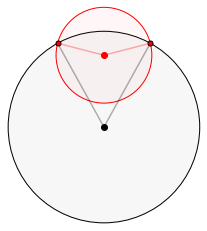

In [4]:
draw(0.75, 0.5)

## Oblate Case

Finding the points of intersection for an ellipsoid is much harder. One of the reasons for this is that there is a special case in which a planet can intersect a star at 4 different points instead of just 2. 

Conceptually, we have two equations, an equation for a circle (planet) $f_c(x,y)$ and an ellipse (star) $f_e(x,y)$. We need to set these equal to each other and solve for x and y to find the points of intersection. 

$$f_c(x,y) = f_e(x,y)$$

In reality, the circle is centered on an arbitrary point ($x_0$, $y_0$) and the ellipse is squished into an ellipse projected onto the sky plane. 

Taking $R_{eq} = a = 1$, we can describe the star completely with semi-minor axis $b = (1-f')$. For simplicity, we can align the star's rotation axis with the y axis.


Lets demonstrate this:

In [5]:
def draw_oblate(b0, rp, f, theta):
    # Set up the figure
    #theta in degrees
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, -rp - 0.01), max(1.01, rp + 0.01));
    ax.set_ylim(-1.01, max(1.01, b0 + rp + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the two bodies
    occulted = Ellipse((0, 0), 1.0*2,(1-f)*2,theta, fill=False, color='k')
    occulted_fill = Ellipse((0, 0), 1.0*2,(1-f)*2,theta, fill=True, color='k',alpha=0.03)
    ax.add_artist(occulted_fill)

    ax.add_artist(occulted)
    occultor = Circle((0, b0), rp, fill=False, color='r')
    occultor_fill = Circle((0, b0), rp, fill=True, color='r',alpha=0.03)
    ax.add_artist(occultor_fill)
    ax.add_artist(occultor)

    ax.plot(0, 0, 'ko')
    ax.plot(0, b0, 'ro')

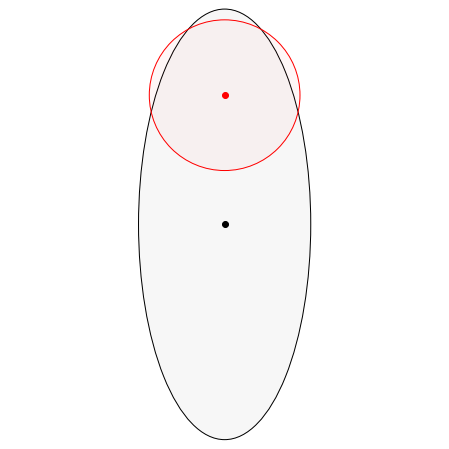

In [6]:
draw_oblate(0.60, 0.35,0.6,90) #theta in degrees

In [7]:
x0, y0, x, y = sp.symbols("x_\mathrm{o} y_\mathrm{o} x y",real=True)
b, r_p = sp.symbols("b r_\mathrm{o}",real=True,positive=True)

### Equation for the (oblate) star:

In [8]:
y_ellipse = ((b)**2)*(1-x**2) #an ellipse centered at the origin with major axis on x axis
display(Math(r'y^2 = ' + latex(y_ellipse)))

<IPython.core.display.Math object>

### Equation for the (off-center, circular) planet:

In [9]:
y_circle = (r_p**2-(x-x0)**2)
display(Math(r'(y-y_\mathrm{o})^2 = ' + latex(y_circle)))

<IPython.core.display.Math object>

### Equation for intersection points:

Show $f_c(x,y) = f_e(x,y)$, with $f_c$ on LHS and $f_e$ on RHS:

In [10]:
display(Math(latex(y_circle-(y-y0)**2) + ' = ' + latex(y_ellipse-y**2)))

<IPython.core.display.Math object>

Now expand out $(y-y_0)^2$ as follows:

$$y^{2} - 2 y y_\mathrm{o} + y_\mathrm{o}^{2} = r_{\mathrm{o}}^{2} - \left(x - x_\mathrm{o}\right)^{2}$$

then, substitute $y^2$ with a function of x

In [11]:
y_squared = (r_p**2-(x-x0)**2) + 2*y*y0-y0
display(Math(r'y^2 = ' + latex(y_squared)))

<IPython.core.display.Math object>

Set $y^2$ terms equal to each other, and rearrange:

In [12]:
display(Math(latex(y_squared- y_ellipse) + r' = 0'))

<IPython.core.display.Math object>

Now finally, isolate for y and then plug y into the circle equation to get a quartic:

In [13]:
display(Math(r'y = ' + latex(sp.solve((y_ellipse - y_squared), y)[0])))

<IPython.core.display.Math object>

In [14]:
quartic = (sp.solve((y_ellipse - y_squared), y)[0])**2 - y_circle
quartic = collect(expand(quartic),x)
quartic

b**4/(4*y_\mathrm{o}**2) - b**2*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + b**2/(2*y_\mathrm{o}) + r_\mathrm{o}**4/(4*y_\mathrm{o}**2) - r_\mathrm{o}**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) - r_\mathrm{o}**2 - r_\mathrm{o}**2/(2*y_\mathrm{o}) + x**4*(b**4/(4*y_\mathrm{o}**2) - b**2/(2*y_\mathrm{o}**2) + 1/(4*y_\mathrm{o}**2)) + x**3*(b**2*x_\mathrm{o}/y_\mathrm{o}**2 - x_\mathrm{o}/y_\mathrm{o}**2) + x**2*(-b**4/(2*y_\mathrm{o}**2) + b**2*r_\mathrm{o}**2/(2*y_\mathrm{o}**2) - b**2*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) - b**2/(2*y_\mathrm{o}) + b**2/(2*y_\mathrm{o}**2) - r_\mathrm{o}**2/(2*y_\mathrm{o}**2) + 3*x_\mathrm{o}**2/(2*y_\mathrm{o}**2) + 1 + 1/(2*y_\mathrm{o})) + x*(-b**2*x_\mathrm{o}/y_\mathrm{o}**2 + r_\mathrm{o}**2*x_\mathrm{o}/y_\mathrm{o}**2 - x_\mathrm{o}**3/y_\mathrm{o}**2 - 2*x_\mathrm{o} - x_\mathrm{o}/y_\mathrm{o}) + x_\mathrm{o}**4/(4*y_\mathrm{o}**2) + x_\mathrm{o}**2 + x_\mathrm{o}**2/(2*y_\mathrm{o}) + 1/4

Finally, we have a polynomial of the form: $$Ax^4 + Bx^3 + Cx^2 + Dx + E = 0$$

where A, B, C, D and E are given below (yes it's complicated):

In [15]:
A, B, C, D, E = Poly(quartic,x).coeffs()

In [16]:
display(Math(r'A = ' + latex(simplify(collect(A*4*y0**2, b)))))

<IPython.core.display.Math object>

In [17]:
display(Math(r'B = ' + latex(collect(B*4*y0**2,b))))

<IPython.core.display.Math object>

In [18]:
display(Math(r'C = ' + latex(collect(C*4*y0**2,b))))

<IPython.core.display.Math object>

In [19]:
display(Math(r'D = ' + latex(collect(D*4*y0**2,b))))

<IPython.core.display.Math object>

In [20]:
display(Math(r'E = ' + latex(collect(E*4*y0**2,b))))

<IPython.core.display.Math object>

Or in terms of the projected oblateness $f_{\mathrm{eff}}$:

In [21]:
feff = sp.symbols("f_{\mathrm{eff}}",real=True,positive=True)
A_f = simplify(collect(A*4*y0**2, b))
A_f = A_f.subs([(b, (1-feff))])
display(Math(r'A = ' + latex(simplify(collect(A_f, feff)))))

<IPython.core.display.Math object>

In [22]:
B_f = simplify(collect(B*4*y0**2, b))
B_f = B_f.subs([(b, (1-feff))])
display(Math(r'B = ' + latex(simplify(collect(B_f, feff)))))

<IPython.core.display.Math object>

In [23]:
C_f = simplify(collect(C*4*y0**2, b))
C_f = C_f.subs([(b, (1-feff))])
display(Math(r'C = ' + latex(simplify(collect(C_f, feff)))))

<IPython.core.display.Math object>

In [24]:
D_f = simplify(collect(D*4*y0**2, b))
D_f = D_f.subs([(b, (1-feff))])
display(Math(r'D = ' + latex(simplify(collect(D_f, feff)))))

<IPython.core.display.Math object>

In [25]:
E_f = simplify(collect(E*4*y0**2, b))
E_f = E_f.subs([(b, (1-feff))])
display(Math(r'E = ' + latex(simplify(collect(E_f, feff)))))

<IPython.core.display.Math object>

Define helper functions to find intersection points of ellipse and circle:

In [26]:
def quartic_poly(x, b0, r_p, f, theta):

    x0 = b0*np.sin((theta))
    y0 = b0*np.cos((theta))
    b = 1-f
    A = b**4 - 2*b**2 + 1
    B = 4*x0*(b**2 - 1)
    C = -2*b**4 + 2*b**2*(r_p**2 - x0**2 - y0 + 1) - 2*r_p**2 + 6*x0**2 + 4*y0**2 + 2*y0
    D = 4*x0*(-b**2 + r_p**2 - x0**2 - 2*y0**2 - y0)
    E = (b**4 + 2*b**2*(-r_p**2 + x0**2 + y0) 
         + r_p**4 - 2*r_p**2*x0**2 - 4*r_p**2*y0**2 
         - 2*r_p**2*y0 + x0**4 + 4*x0**2*y0**2 + 2*x0**2*y0 + y0**2)
    
    return (A*x**4 + B*x**3 + C*x**2 + D*x + E)

def quartic_poly_2(x, b0, r_p, f, theta):
    x0 = b0*np.sin(theta)
    y0 = b0*np.cos(theta)
    A, B, C, D, E = coeffs(1-f,x0,y0,r_p)
    return (A*x**4 + B*x**3 + C*x**2 + D*x + E)

def coeffs(b, xo, yo, ro):
    A = (1 - b ** 2) ** 2
    B = -4 * xo * (1 - b ** 2)
    C = -2 * (b ** 4 + ro ** 2 - 3 * xo ** 2 - yo ** 2 - b ** 2 * (1 + ro ** 2 - xo ** 2 + yo ** 2))
    D = -4 * xo * (b ** 2 - ro ** 2 + xo ** 2 + yo ** 2)
    E = b ** 4 - 2 * b ** 2 * (ro ** 2 - xo ** 2 + yo ** 2) + (ro ** 2 - xo ** 2 - yo ** 2) ** 2
    return np.array([A, B, C, D, E])


def find_intersections(b0, r_p, f, theta):
    """ 
    b0: impact parameter
    r_p: planet radius
    f: oblateness coefficient
    theta: spin-orbit obliquity *in degrees*
    """
    
    x0 = b0*np.sin(theta)
    y0 = b0*np.cos(theta)
    b = (1.0-f)
    A = b**4 - 2*b**2 + 1
    B = 4*x0*(b**2 - 1)
    C = -2*b**4 + 2*b**2*(r_p**2 - x0**2 - y0 + 1) - 2*r_p**2 + 6*x0**2 + 4*y0**2 + 2*y0
    D = 4*x0*(-b**2 + r_p**2 - x0**2 - 2*y0**2 - y0)
    E = (b**4 + 2*b**2*(-r_p**2 + x0**2 + y0) 
         + r_p**4 - 2*r_p**2*x0**2 - 4*r_p**2*y0**2 
         - 2*r_p**2*y0 + x0**4 + 4*x0**2*y0**2 + 2*x0**2*y0 + y0**2)
    return np.roots(np.array([A,B,C,D,E])), np.polyval(np.abs([A,B,C,D,E]),np.abs(np.roots(np.array([A,B,C,D,E]))))

def find_intersections_2(b0, r_p, f, theta):
    """ 
    b0: impact parameter
    r_p: planet radius
    f: oblateness coefficient
    theta: spin-orbit obliquity *in degrees*
    """
    
    x0 = b0*np.sin(theta)
    y0 = b0*np.cos(theta)
    coeff = coeffs(1-f,x0,y0,r_p)
    return np.roots(coeff), np.polyval(np.abs(coeff),np.abs(np.roots(coeff)))
def circle_err(x, y, b0, rp, theta):
    return np.abs((y-b0*np.cos(theta))**2-(rp**2 - (x-b0*np.sin(theta))**2))

Update the plotting function so it plots the intersection points:

In [27]:
def draw_oblate(b0, rp, f, theta):
    # Set up the figure
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, -rp - 0.01), max(1.01, rp + 0.01));
    ax.set_ylim(-1.01, max(1.01, b0 + rp + 0.01));
    ax.set_aspect(1);

    # Draw the two bodies
    occulted = Ellipse((0, 0), 1.0*2,(1-f)*2,np.degrees(theta), fill=False, color='k')
    ax.add_artist(occulted)
    occultor = Circle((0, b0), rp, fill=False, color='r')
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b0, 'ro')
    
    roots, err = find_intersections_2(b0, rp, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    
    # Mark the points of intersection if they exist
    if len(roots)>0:
        #Lambda
        for x_root in roots_real:
            x_root = np.real(x_root)
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x = r*np.cos(lam_pos)
            y = r*np.sin(lam_pos)
            
            x_neg = r*np.cos(lam_neg)
            y_neg = r*np.sin(lam_neg)
            special = False
            if circle_err(x, y, b0, rp, theta) > circle_err(x_neg, y_neg, b0, rp, theta):
                x = x_neg
                y = y_neg
            elif np.isclose(circle_err(x, y, b0, rp, theta), circle_err(x_neg, y_neg, b0, rp, theta),atol=1e-8):
                #90 degree case, or too close to tell
                special = True
            
            def rot(x,y, theta):
                #return x,y rotated back into the standard reference frame F
                return (x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta))
            def rot_Fprime(b0, theta):
                #return (0,b0) rotated to the integral reference frame F'
                return (x*np.cos(theta) + y*np.sin(theta), -x*np.sin(theta) + y*np.cos(theta))   
            

            plt.plot([0, rot(x, y, theta)[0]], [0, rot(x, y, theta)[1]], 'k-', alpha=0.3)
            plt.plot(rot(x, y, theta)[0], rot(x, y, theta)[1], 'ko', ms=5)
            plt.plot([0,rot(x, y, theta)[0]],[b0, rot(x, y, theta)[1]], 'r-', alpha=0.3)
            if special:
                plt.plot([0, rot(x_neg, y_neg, theta)[0]], [0, rot(x_neg, y_neg, theta)[1]], 'k-', alpha=0.3)
                plt.plot(rot(x_neg, y_neg, theta)[0], rot(x_neg, y_neg, theta)[1], 'ko', ms=5)
                plt.plot([0,rot(x_neg, y_neg, theta)[0]],[b0, rot(x_neg, y_neg, theta)[1]], 'r-', alpha=0.3)

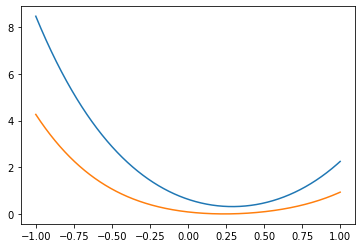

In [28]:
#for some reason, my function to find the polynomial coefficients diverges significantly from Rodrigo's
#even though they seem completely equivalent except for bunching terms
x = np.linspace(-1,1,10000)
plt.plot(x, quartic_poly(x, 0.80, 0.35,0.6,np.radians(20)))
plt.plot(x, quartic_poly_2(x, 0.80, 0.35,0.6,np.radians(20)))

## Case 1 (4 points of intersection):

This is a rather pathological scenario where there are actually 4 points of intersection. See some examples below. Probably can be ignored in real life cases, but you never know. 

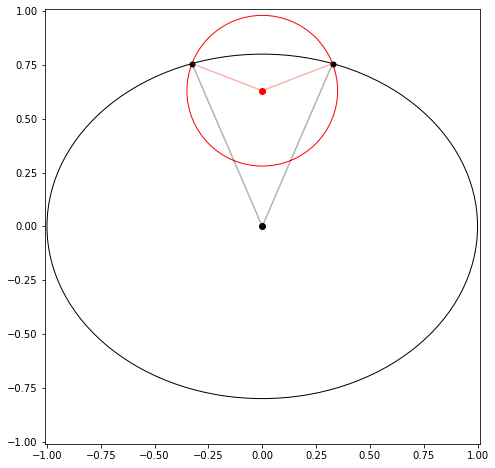

In [41]:
draw_oblate(0.63, 0.35,0.2,np.radians(0))
plt.savefig('../imgs/integration_bounds.png',dpi=300)

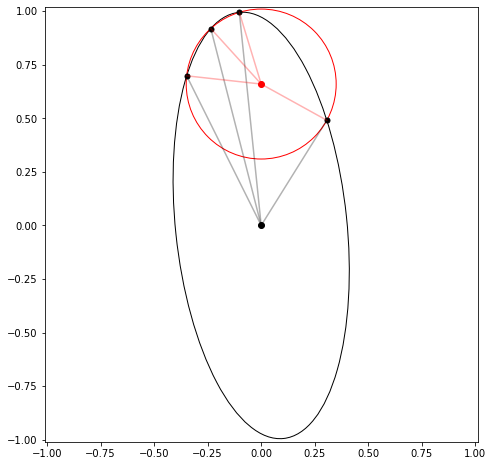

In [30]:
draw_oblate(0.66, 0.35,0.6,np.radians(96))

## Case 2 (2 points of intersection)

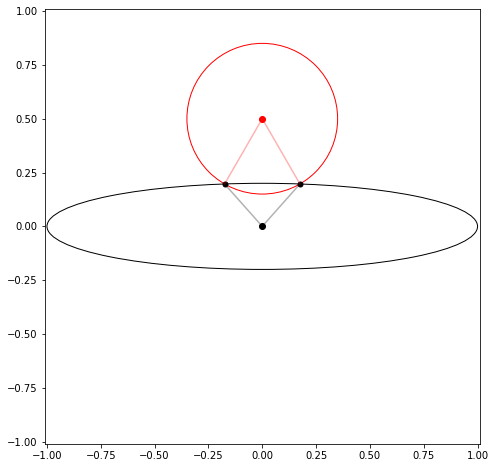

In [31]:
draw_oblate(0.50, 0.35,0.8,np.radians(0))

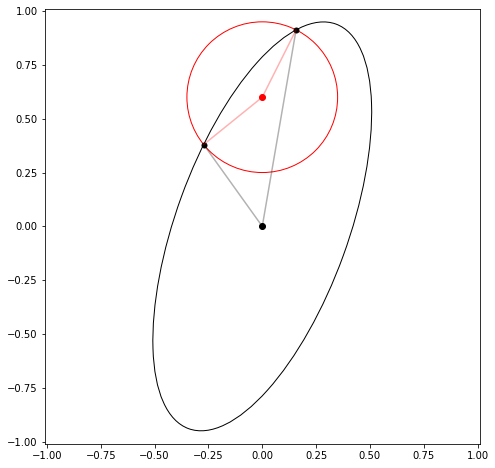

In [32]:
draw_oblate(0.60, 0.35,0.6,np.radians(70))

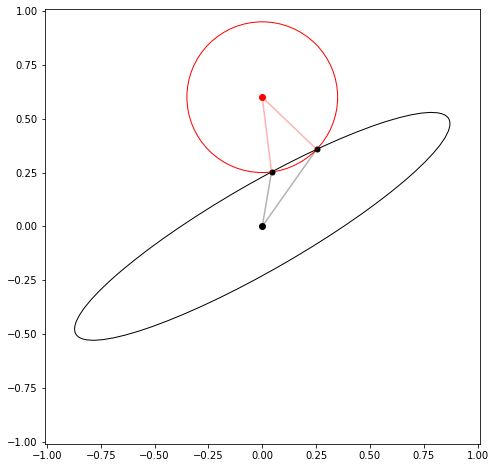

In [33]:
draw_oblate(0.60, 0.35,0.8,np.radians(30))

### Finding the $\xi$ angle

The way the intersections are parametrized in Luger et al. (in prep) is not the same as shown above. Instead, the angles are parametrized by an angular parameter similar to eccentric anomaly. However, this is easy to get from our calculations above, with only minor modifications to the original function. 

In [36]:
def draw_oblate_squiggly(b0, rp, f, theta):
    
    """theta in radians"""
    # Set up the figure
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, -rp - 0.01), max(1.01, rp + 0.01));
    ax.set_ylim(-1.01, max(1.01, b0 + rp + 0.01));
    ax.set_aspect(1);

    # Draw the two bodies
    occulted = Ellipse((0, 0), 1.0*2,(1-f)*2,np.degrees(theta), fill=False, color='k')
    occulted_circ = Circle((0, 0), 1.0, fill=False, color='b')
    ax.add_artist(occulted)
    ax.add_artist(occulted_circ)
    occultor = Circle((0, b0), rp, fill=False, color='r')
    ax.add_artist(occultor)
    ax.plot(0, 0, 'ko')
    ax.plot(0, b0, 'ro')
    
    roots, err = find_intersections_2(b0, rp, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    # Mark the points of intersection if they exist
    angles = []
    if len(roots)>0:
        #Xi
        for x_root in roots_real:
            x_root = np.real(x_root)
            
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x_int = r*np.cos(lam_pos)
            y_int = r*np.sin(lam_pos)
            
            xi = np.arctan2(np.sqrt(1-x_root**2),x_root)
            xi_neg = np.arctan2(-np.sqrt(1-x_root**2),x_root)
            
            x = np.cos(xi)
            y = np.sin(xi)           

            x_int_neg = r*np.cos(lam_neg)
            y_int_neg = r*np.sin(lam_neg)
            
            special = False
            if circle_err(x_int, y_int, b0, rp, theta) > circle_err(x_int_neg, y_int_neg, b0, rp, theta):
                x_int = x_int_neg
                y_int = y_int_neg
                x = np.cos(xi_neg)
                y = np.sin(xi_neg)
            elif np.isclose(circle_err(x_int, y_int, b0, rp, theta), circle_err(x_int_neg, y_int_neg, b0, rp, theta),atol=1e-8):
                #90 degree case, or too close to tell
                special = True
            
            
            def rot(x,y, theta):
                #return x,y rotated back into the standard reference frame F
                return (x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta))
            #plot the intersection points and draw a blue line from the origin to the outer radius of the bounding circle
            plt.plot([0, rot(x, y, theta)[0]], [0, rot(x, y, theta)[1]], 'b-', alpha=0.3)
            plt.plot(rot(x, y, theta)[0], rot(x, y, theta)[1], 'ko', ms=5)
            plt.plot(rot(x_int, y_int, theta)[0], rot(x_int, y_int, theta)[1], 'ko', ms=5)
            
            #plot the red line from center of planet to intersectioon points
            plt.plot([0,rot(x_int, y_int, theta)[0]],[b0, rot(x_int, y_int, theta)[1]], 'r-', alpha=0.3)

            xs = [rot(x, y, theta)[0],rot(x, 0, theta)[0]]
            ys = [rot(x, y, theta)[1],rot(x, 0, theta)[1]]
            
            smax = [rot(-1, 0, theta)[0], rot(1, 0, theta)[0]]
            smay = [rot(-1, 0, theta)[1], rot(1, 0, theta)[1]]
            plt.plot(xs, ys, 'k-', alpha=0.4)
            plt.plot(smax, smay, 'k-', alpha=0.4)

            angles.append(xi)
        return np.degrees(angles)

array([38.55816779, 83.69452538])

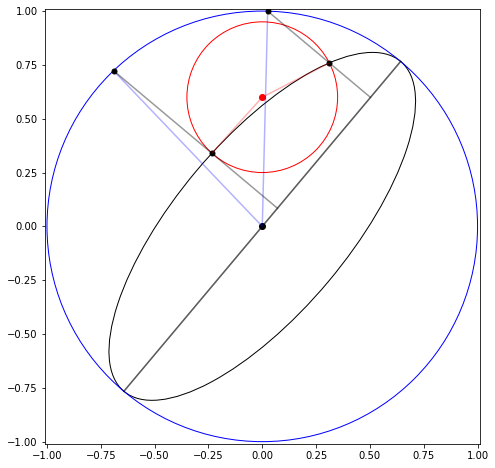

In [37]:
draw_oblate_squiggly(0.60, 0.35,0.6,np.radians(50))

In [ ]:
draw_oblate_squiggly(0.60, 0.35,0.6,np.radians(92))

## Integration Angles!

Finally, using the plotting code shown above, let's take out just the relevant bits: functions to find the integration bounds $\xi$ and $\phi$.

In [ ]:
def compute_xi(b0, r_p, f, theta):
    """ 
    b0: impact parameter
    r_p: planet radius
    f: oblateness coefficient
    theta: spin-orbit obliquity *in degrees*
    """
    
    roots, err = find_intersections_2(b0, r_p, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    
    # Mark the points of intersection if they exist
    angles = []
    if len(roots)>0:
        #Xi
        for x_root in roots_real:
            #x value of intersection point
            x_root = np.real(x_root)
            
            #find angles of intersection on ellipse of a=1 and b=(1-f)
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x_int = r*np.cos(lam_pos)
            y_int = r*np.sin(lam_pos)
            
            xi = np.arctan2(np.sqrt(1-x_root**2),x_root)
            xi_neg = np.arctan2(-np.sqrt(1-x_root**2),x_root)     
            x_int_neg = r*np.cos(lam_neg)
            y_int_neg = r*np.sin(lam_neg)
            if circle_err(x_int, y_int, b0, r_p, theta) > circle_err(x_int_neg, y_int_neg, b0, r_p, theta):
                xi = xi_neg
                print("Xi neg: " + str(xi_neg))
                
            angles.append(xi)
    return np.array(angles)

def compute_phi(b0, r_p, f, theta):
    roots, err = find_intersections_2(b0, r_p, f, theta)
    roots_real = roots[np.isclose(roots,np.real(roots),atol=0.0001)] #discard imaginary roots
    
    # Mark the points of intersection if they exist
    angles = []
    if len(roots)>0:
        #phi
        for x_root in roots_real:
            #x value of intersection point
            x_root = np.real(x_root)
            
            def rot(b0, theta):
                #return (0,b0) rotated to the integral reference frame F'
                return (b0*np.sin(theta), b0*np.cos(theta))   
            
            #find angles of intersection on ellipse of a=1 and b=(1-f)
            lam_pos = np.arctan2((1-f)*np.sqrt(1-x_root**2),x_root)
            lam_neg = np.arctan2(-(1-f)*np.sqrt(1-x_root**2),x_root)

            r = (1-f)/np.sqrt(((1-f)*np.cos(lam_pos))**2 + np.sin(lam_pos)**2)            
            
            x_int = r*np.cos(lam_pos)
            y_int = r*np.sin(lam_pos)
            x0, y0 = rot(b0, theta)  
            x_int_neg = r*np.cos(lam_neg)
            y_int_neg = r*np.sin(lam_neg)
            
            phi = theta + np.arctan2(y_int-y0,x_root-x0)
            phi_neg = (theta - np.arctan2(-(y_int_neg-y0),x_root-x0))
            
            if circle_err(x_int, y_int, b0, r_p, theta) > circle_err(x_int_neg, y_int_neg, b0, r_p, theta):
                phi = phi_neg
                print("Phi neg")
                
            print(x_int,y_int)
            angles.append(phi)
    return np.array(angles)